In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
class LinearRegressionScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
        return X @ np.concatenate([[self.intercept_], self.coef_])

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def r_squared_score(self, X, y):
        y_pred = self.predict(X)
        ssr = np.sum((y_pred - y.mean()) ** 2)
        sst = np.sum((y - y.mean()) ** 2)
        r_squared = 1 - (ssr / sst)
        return r_squared * 100

In [3]:
df = pd.read_csv('movies_dataset_processed.csv')
df

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post,bucket
0,0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23,6.0
1,1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15,6.0
2,2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59,7.0
3,3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4,4.0
4,4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,9897,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan",2792,9.0
9898,9898,7.0,G,Guy Hamilton,"2,544",Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster",106,8.0
9899,9899,5.6,R,Barbara Topsøe-Rothenborg,"12,284",Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De...",16947,10.0
9900,9900,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan",2792,9.0


In [4]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_year']

0       2023
1       2023
2       2021
3       2023
4       2022
        ... 
9897    1962
9898    1969
9899    1970
9900    1962
9901    1969
Name: release_year, Length: 9902, dtype: int32

In [5]:
df

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post,bucket,release_year
0,0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23,6.0,2023
1,1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15,6.0,2023
2,2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59,7.0,2021
3,3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4,4.0,2023
4,4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78,7.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,9897,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan",2792,9.0,1962
9898,9898,7.0,G,Guy Hamilton,"2,544",Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster",106,8.0,1969
9899,9899,5.6,R,Barbara Topsøe-Rothenborg,"12,284",Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De...",16947,10.0,1970
9900,9900,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan",2792,9.0,1962


In [6]:
cols_to_label_enc = ['appropriate_for', 'director', 'industry']
label_encs = {}
for col in cols_to_label_enc:
    label_encs[col] = {}
    unique_values = df[col].unique()
    for i, value in enumerate(unique_values):
        label_encs[col][value] = i
    df[col] = df[col].apply(lambda x: label_encs[col][x])

In [7]:
df['downloads'] = df['downloads'].apply(lambda x: float(str(x).replace(',', '')))
df['views'] = df['views'].apply(lambda x: float(str(x).replace(',', '')))

In [8]:
import random

In [9]:
#Train-Test Split
test_size = 0.3
num_test_samples = int(test_size * df.shape[0])
num_train_samples = df.shape[0] - num_test_samples
df_train = df.sample(num_train_samples, random_state=42)
df_test = df.drop(df_train.index)

In [10]:
#Gathering X, Y for training set
X_cols = ['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'industry', 'run_time', 'views', 'release_year']
Y_col = 'days_to_post'
X_train = df_train[X_cols].values
y_train = df_train[Y_col].values.reshape(-1, 1)

X_test = df_test[X_cols].values
y_test = df_test[Y_col].values.reshape(-1, 1)


In [11]:
lr = LinearRegressionScratch()
lr.fit(X_train, y_train)

In [12]:
X_train

array([[6.70000e+00, 8.00000e+00, 2.16800e+03, ..., 1.30000e+02,
        2.98420e+04, 2.01800e+03],
       [5.00000e+00, 4.00000e+00, 4.59800e+03, ..., 1.14000e+02,
        4.20780e+04, 2.01200e+03],
       [6.10000e+00, 0.00000e+00, 1.30000e+01, ..., 1.10000e+02,
        3.12900e+03, 2.02300e+03],
       ...,
       [6.70000e+00, 4.00000e+00, 1.73200e+03, ..., 1.17000e+02,
        2.67930e+04, 2.01900e+03],
       [8.20000e+00, 0.00000e+00, 1.80500e+03, ..., 1.80000e+02,
        1.74654e+05, 2.01400e+03],
       [6.40000e+00, 0.00000e+00, 9.89000e+02, ..., 1.06000e+02,
        2.92210e+04, 2.01100e+03]])

In [15]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
r_squared = r2_score(y_pred, y_test)
print(f'R^2 score: {r_squared:.2f}')


Mean squared error: 2291391.67
R^2 score: 0.73


In [16]:
from sklearn.linear_model import LinearRegression

sk_lr=LinearRegression()
sk_lr.fit(X_train,y_train)

sk_lr.score(X_test,y_test)

0.7619356503555235

In [17]:
y_pred = sk_lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'R^2 score: {r2:.2f}')
print(f'Mean squared error: {mse:.2f}')



R^2 score: 0.76
Mean squared error: 2291391.67


In [18]:
import matplotlib.pyplot as plt

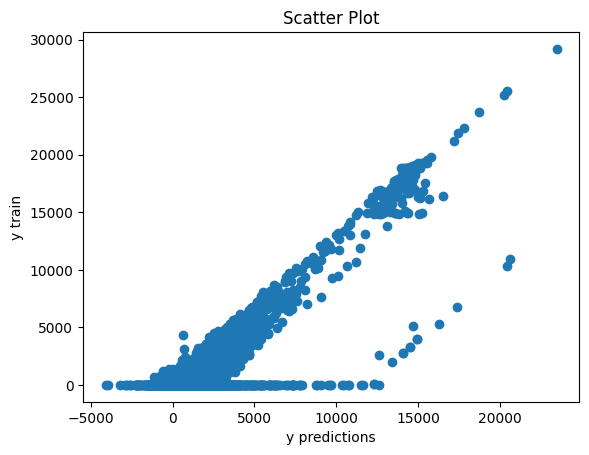

In [19]:
y_pred = sk_lr.predict(X_train)

fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)

# Set the plot title and axis labels
ax.set_title('Scatter Plot')
ax.set_xlabel('y predictions')
ax.set_ylabel('y train')

# Display the plot
plt.show()